In [5]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [6]:
from keras.models import load_model

# pretrained_model = load_model("MobileNetV3Large.keras")

/Users/vpedos/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.applications import MobileNetV3Large
from keras.layers import Conv2D , MaxPool2D , Input , GlobalAveragePooling2D ,AveragePooling2D, Dense , Dropout ,Activation, Flatten , BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

from tensorflow.keras import Model



In [7]:
TRAIN_DIR = 'plant_leave_disease_dataset/Grape/train'
TEST_DIR = 'plant_leave_disease_dataset/Grape/test'

train_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split = 0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [8]:
# Split the data into three categories.
train_images = train_generator.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=8,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=2,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1,
    shuffle=False
)

Found 2600 images belonging to 4 classes.
Found 648 images belonging to 4 classes.
Found 814 images belonging to 4 classes.


In [9]:
# Resize Layer
resize_and_rescale = keras.Sequential([
  layers.Resizing(224,224),
  layers.Rescaling(1./255),
])

# Setup data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),                       
], name="data_augmentation")

In [10]:
print(len(train_images))
print(len(val_images))

325
324


In [11]:
# Load the pretained model
pretrained_model.trainable = False

In [12]:
# Build model
inputs = pretrained_model.input
x = resize_and_rescale(inputs)
x = data_augmentation(x)

x = Dense(512, activation='relu')(pretrained_model.output)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)

outputs = Dense(4, activation='softmax')(x)

model_final = Model(inputs=inputs, outputs=outputs)

model_final.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [13]:
# Create checkpoint callback
checkpoint_path = "./Grape_model/Checkpoint/model_grapeFinal.keras"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=False,
                                      monitor="val_accuracy",
                                      save_best_only=True)


# Create callback to visualize data
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./Grape_model/GraphFinal', 
                                             histogram_freq=1, write_graph=True, 
                                             write_images=True, embeddings_freq=1)

In [14]:
# Train the model
history_final = model_final.fit(
    train_images,
    validation_data=val_images,
    epochs=25,
    callbacks=[
        EarlyStopping(patience = 5),
        tb_callback,
        checkpoint_callback,
    ]
)

Epoch 1/25


/Users/vpedos/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.3415 - loss: 1.6052 - val_accuracy: 0.7531 - val_loss: 0.8008
Epoch 2/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.5938 - loss: 0.9712 - val_accuracy: 0.7963 - val_loss: 0.5706
Epoch 3/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.7357 - loss: 0.6984 - val_accuracy: 0.8580 - val_loss: 0.4353
Epoch 4/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8007 - loss: 0.5527 - val_accuracy: 0.8889 - val_loss: 0.3525
Epoch 5/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.8384 - loss: 0.4504 - val_accuracy: 0.9105 - val_loss: 0.2966
Epoch 6/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8688 - loss: 0.3833 - val_accuracy: 0.9228 - val_loss: 0.2515
Epoch 7/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.8926 - loss: 0.3230 - val_accuracy: 0.9336 - val_loss: 0.2211
Epoch 8/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9053 - loss: 0.2861 - val_accurac

In [15]:
# Show metrics
train_acc, train_loss = model_final.evaluate(train_images, verbose=0)
val_acc, val_loss = model_final.evaluate(val_images, verbose=0)
test_acc, test_loss = model_final.evaluate(test_images, verbose=0)
print("    Train Loss: {:.5f}".format(train_acc))
print("Train Accuracy: {:.2f}%".format(train_loss * 100))
print("    Valid Loss: {:.5f}".format(val_acc))
print("Valid Accuracy: {:.2f}%".format(val_loss * 100))
print("    Test Loss: {:.5f}".format(test_acc))
print("Test Accuracy: {:.2f}%".format(test_loss * 100))

    Train Loss: 0.03675
Train Accuracy: 98.77%
    Valid Loss: 0.07979
Valid Accuracy: 97.53%
    Test Loss: 0.06052
Test Accuracy: 98.03%


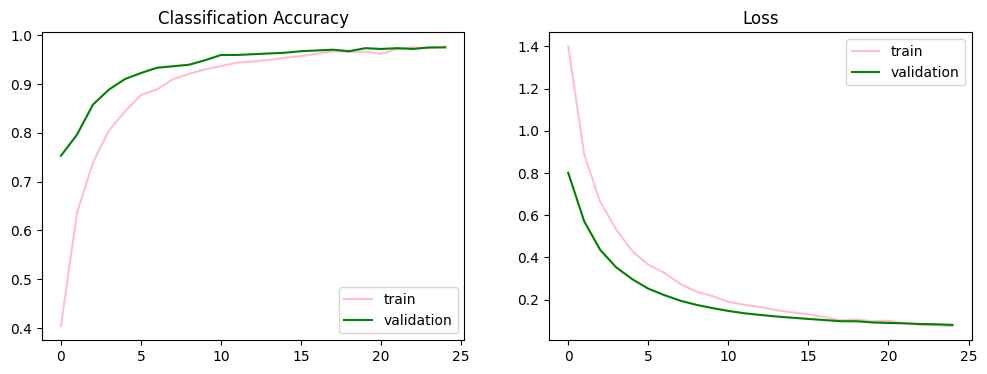

In [16]:
fig, (acc, loss) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 4)
acc.title.set_text('Classification Accuracy')
acc.plot(history_final.history['accuracy'], color = 'pink', label = 'train')
acc.plot(history_final.history['val_accuracy'], color = 'green', label = 'validation')
acc.legend(['train', 'validation'])

loss.title.set_text('Loss')
loss.plot(history_final.history['loss'], color = 'pink', label = 'train')
loss.plot(history_final.history['val_loss'], color = 'green', label = 'validation')
loss.legend(['train', 'validation'])

plt.show()


In [17]:
model_final.save('grape_model_final.h5')

In [26]:
from keras.saving import save_model
model_final.save("grape_model_final.keras")

In [7]:
keras_model = load_model("grape_model_final.keras")

/Users/vpedos/Library/Python/3.9/lib/python/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


814/814 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step
Confusion Matrix
Normalized confusion matrix
Classification Report
               precision    recall  f1-score   support

Black Measles       0.96      0.98      0.97       277
    Black rot       0.97      0.96      0.97       236
      Healthy       1.00      1.00      1.00        85
  Leaf blight       1.00      1.00      1.00       216

     accuracy                           0.98       814
    macro avg       0.98      0.98      0.98       814
 weighted avg       0.98      0.98      0.98       814



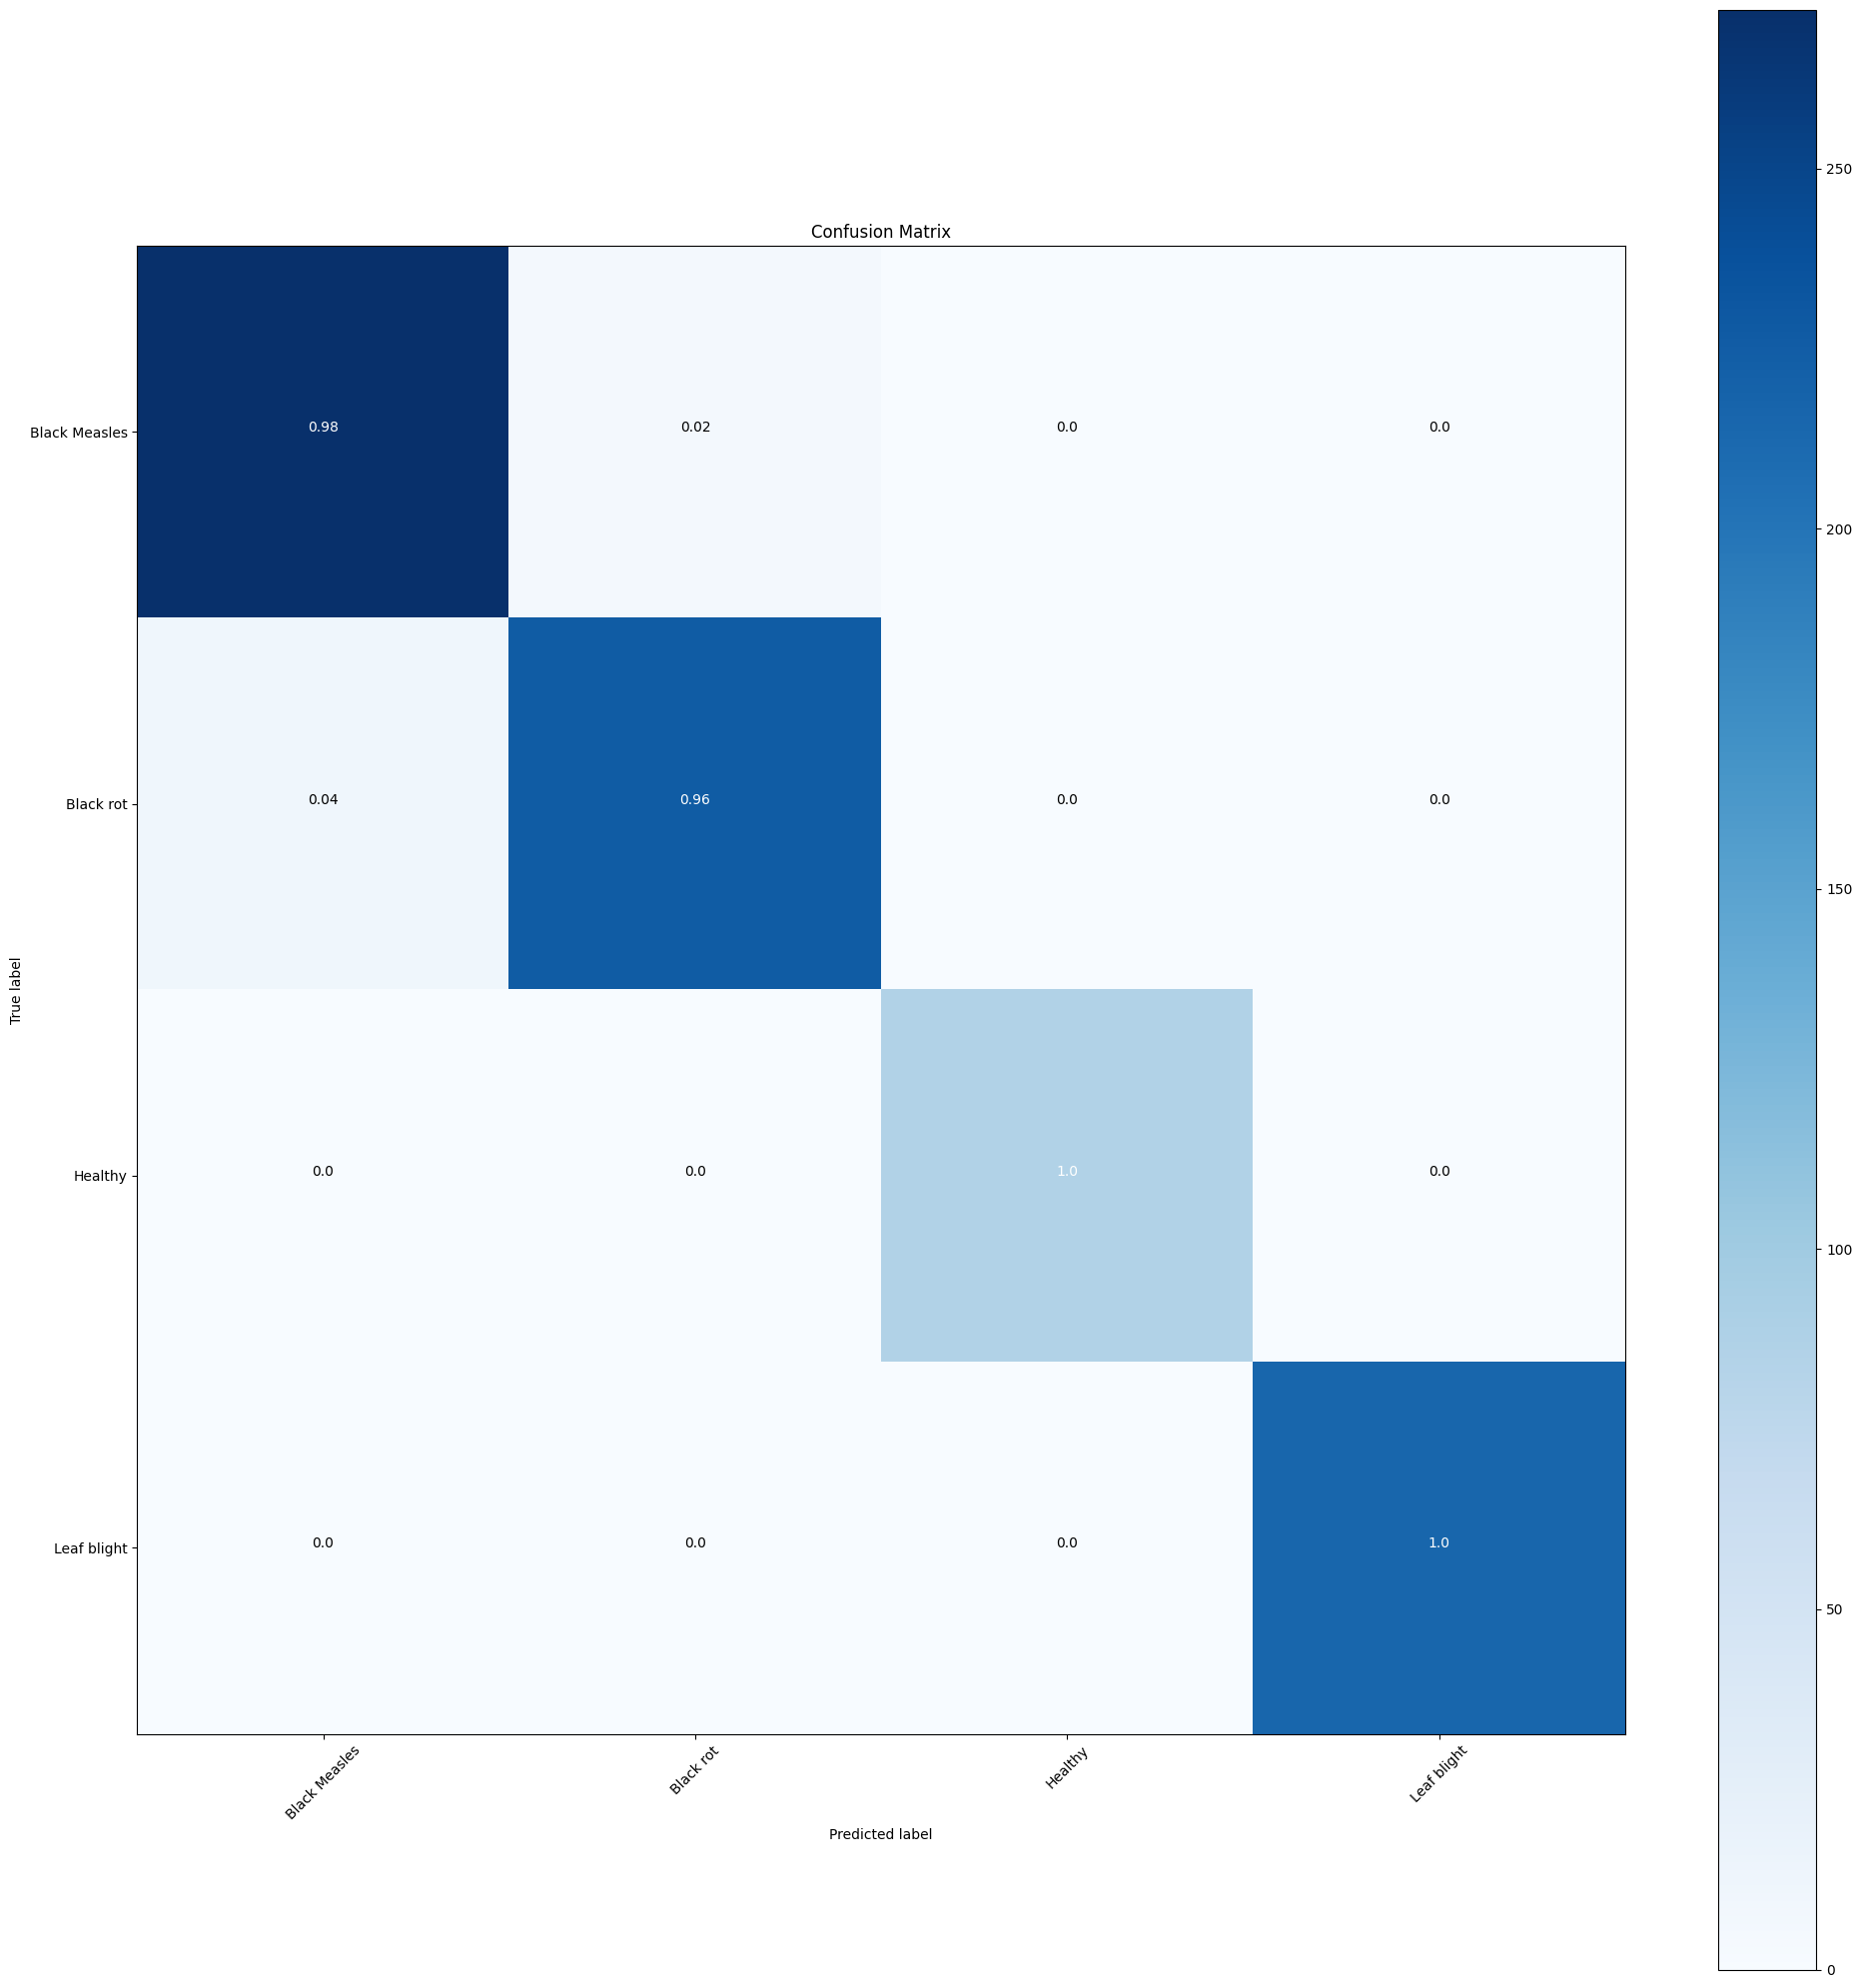

In [34]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in train_images.class_indices:
    target_names.append(key)


#Confution Matrix
Y_pred = keras_model.predict(test_images)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_images.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_images.classes, y_pred, target_names=target_names))